**Explication de la variable sortie binaire NTLBIN**

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [43]:
data=pd.read_csv('datafinbrutes.csv')
data=data.drop('N TL',axis=1)
data=data.drop('COM',axis=1)
data=data.drop('Nom Commune',axis=1)

In [44]:
numerical_data = data.select_dtypes(exclude=['object'])
correlations = numerical_data.corr()['NTLBIN']
#print(correlations)
threshold = 0.3  # Remplacez par le seuil de votre choix

# Filtrer les corrélations supérieures au seuil
filtered_correlations = correlations[correlations.abs() > threshold]

# Afficher les corrélations filtrées
print("\nCorrélations supérieures à", threshold, ":")
print(filtered_correlations)


Corrélations supérieures à 0.3 :
P20_SCOL1517           0.369496
ETTEF2021              0.320979
P20_NSCOL15P_CAPBEP    0.415408
P20_NSCOL15P_BAC       0.369328
P20_NSCOL15P_SUP2      0.344966
P20_NSCOL15P_SUP34     0.301392
ETTEF5021              0.314096
ETTEF1021              0.316242
ETTEF121               0.321291
ETTEF021               0.307884
P20_POP1564            0.321130
P20_ACT1564            0.324934
P20_ACTOCC1564         0.322718
P20_CHOMEUR1564        0.332182
P20_CHOM_DIPLMIN       0.348797
P20_ACT_DIPLMIN        0.366116
P20_INACT1564          0.307981
P20_RETR1564           0.403362
P20_AINACT1564         0.354637
C20_ACT1564_CS2        0.332032
C20_ACT1564_CS4        0.312003
NBPERSMENFISC20        0.352502
NTLBIN                 1.000000
SumOfNB_EQUIP          0.434099
Name: NTLBIN, dtype: float64


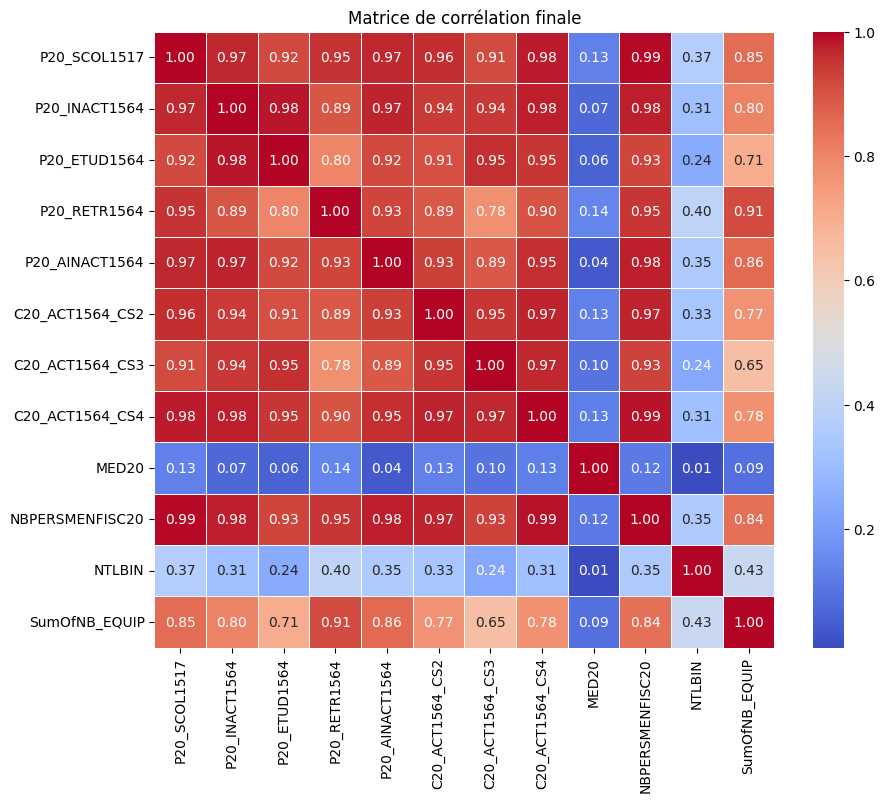

In [50]:
numerical_data = data.select_dtypes(exclude=['object'])

# Calculer la matrice de corrélation
correlation_matrix = numerical_data.corr()

# Boucle jusqu'à ce qu'il n'y ait plus de corrélations supérieures à 0.90
while True:
    # Trouver les paires de variables fortement corrélées
    upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
    high_corr = (upper > 0.995).any()
    
    # Sortir de la boucle si aucune corrélation supérieure à 0.90 n'est trouvée
    if not high_corr.any():
        break

    # Identifier la première variable corrélée
    first_high_corr = high_corr.index[high_corr.argmax()]
    
    # Identifier les variables corrélées avec la première variable
    corr_with_first = correlation_matrix[first_high_corr][correlation_matrix[first_high_corr] > 0.1].index.tolist()

    # Supprimer une des variables corrélées
    numerical_data.drop(corr_with_first[1], axis=1, inplace=True)

    # Recalculer la matrice de corrélation
    correlation_matrix = numerical_data.corr()
# Tracer la matrice de corrélation finale avec Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Matrice de corrélation finale")
plt.show()


In [51]:
print(correlations)

P20_SCOL1517           0.369496
P20_SCOL1824           0.209010
ETTEF2021              0.320979
P20_SCOL2529           0.182794
P20_NSCOL15P_CAPBEP    0.415408
P20_NSCOL15P_BAC       0.369328
P20_NSCOL15P_SUP2      0.344966
P20_NSCOL15P_SUP34     0.301392
P20_NSCOL15P_SUP5      0.229219
ETTEF5021              0.314096
ETTEF1021              0.316242
ETTEF121               0.321291
ETTEF021               0.307884
P20_POP1564            0.321130
P20_ACT1564            0.324934
P20_ACTOCC1564         0.322718
P20_CHOMEUR1564        0.332182
P20_CHOM_DIPLMIN       0.348797
P20_CHOM_SUP34         0.254478
P20_CHOM_SUP5          0.204679
P20_ACT_DIPLMIN        0.366116
P20_ACT_SUP34          0.277911
P20_ACT_SUP5           0.213081
P20_INACT1564          0.307981
P20_ETUD1564           0.244440
P20_RETR1564           0.403362
P20_AINACT1564         0.354637
C20_ACT1564_CS2        0.332032
C20_ACT1564_CS3        0.235147
C20_ACT1564_CS4        0.312003
MED20                  0.009072
NBPERSME